In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium

In [2]:
df = pd.read_csv('COVID-19 Coronavirus.csv')
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [3]:
df.isnull().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [5]:
pip install plotly==5.7.0

     |████████████████████████████████| 28.8 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [6]:
import plotly.graph_objects as go
import pandas as pd


fig = go.Figure(data=go.Choropleth(
    locations = df['ISO 3166-1 alpha-3 CODE'],
    z = df['Population'],
    text = df['Country'],
    colorscale = 'viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '$',
    colorbar_title = 'Population in Billions',
))

fig.update_layout(
    title_text='The current world population by countries',
    title_x = 0.50,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text="Source: Worldometer's global COVID-19 statistics",
        showarrow = False
    )]
)
fig.show()

Visualizing Total COVID 19 Coronavirus cases

In [7]:
fig = go.Figure(data=go.Choropleth(
    locations = df['ISO 3166-1 alpha-3 CODE'],
    z = df['Total Cases'],
    text = df['Country'],
    colorscale = 'plasma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '$',
    colorbar_title = 'COVID 19 cases in Millions',
))

fig.update_layout(
    title_text='Total COVID 19 Coronavirus cases',
    title_x = 0.50,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text="Source: Worldometer's global COVID-19 statistics",
        showarrow = False
    )]
)
fig.show()

Visualizing COVID 19 Coronavirus Most Affected Continents

In [8]:
df['Continent'] = df['Continent'].replace({'Africa':'africa', 'Asia': 'asia', 'Europe': 'europe', 
                                           'Latin America and the Caribbean': 'southAmerica',
                                           'Northern America':'northAmerica','Oceania':'oceania'})

In [9]:
df_cont = df[["Country", "Total Cases", "Continent"]]
df_cont = df_cont.groupby("Continent").sum()
df_cont = df_cont.reset_index()
df_cont

,Continent,Total Cases
0,africa,11764207
1,asia,140957179
2,europe,180332483
3,northAmerica,85364770
4,oceania,5647957
5,southAmerica,67509231


In [10]:
# import json
# world_geo = os.path.join('world.geojson') # geojson file

# # create a plain world map
# world_map = folium.Map(location=[40, 0], zoom_start=2)

# # generate choropleth map using the total immigration of each country to Australia from 1980 to 2008
# folium.Choropleth(
#     geo_data=world_geo,
#     data=df_cont,
#     columns=['Continent', 'Total Cases'],
#     key_on='feature.properties.continent',
#     fill_color='YlOrRd', 
#     fill_opacity=0.7, 
#     line_opacity=0.2,
#     legend_name='COVID 19 Coronavirus Most Affected Continents'
# ).add_to(world_map)

# # display map
# world_map

Visualizing Continents with most deaths related to COVID 19 Coronavirus reported

In [11]:
df_cont = df[["Country", "Total Deaths", "Continent"]]
df_cont = df_cont.groupby("Continent").sum()
df_cont = df_cont.reset_index()
df_cont

,Continent,Total Deaths
0,africa,252873
1,asia,1405003
2,europe,1775727
3,northAmerica,1046062
4,oceania,9336
5,southAmerica,1686828


Visualizing Deaths per total cases among five continents

In [12]:
df_cont = df[["Country", "Death percentage", "Continent"]]
df_cont = df_cont.groupby("Continent").sum()
df_cont = df_cont.reset_index()
df_cont = df_cont.sort_values(by = "Death percentage", ascending = False)
df_cont

,Continent,Death percentage
0,africa,115.517859
1,asia,76.218998
5,southAmerica,74.150978
2,europe,47.586433
4,oceania,7.899474
3,northAmerica,3.554359


No handles with labels found to put in legend.


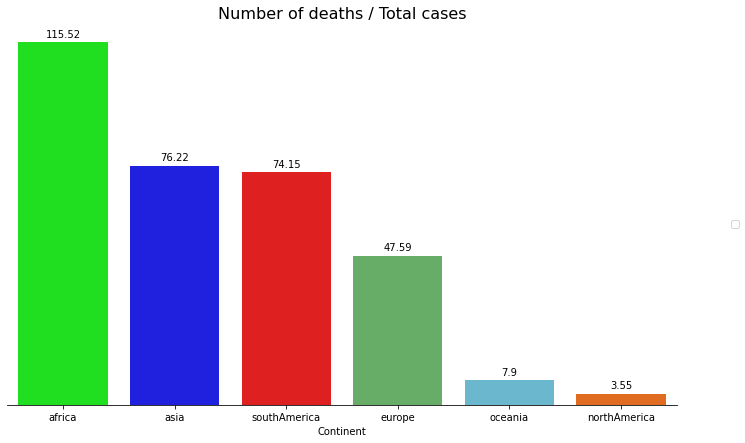

In [13]:
plt.figure(figsize = (12,7))
color = ["#00FF00","#0000FF", '#FF0000', "#5cb85c", "#5bc0de", "#FF6600"]
ax = sns.barplot(x=df_cont['Continent'], y=df_cont['Death percentage'].round(2), palette = color)
ax.set_title ("Number of deaths / Total cases",fontsize= 16)
ax.legend (fontsize= 10, bbox_to_anchor=(1.1, 0.5))
ax.xaxis.set_tick_params(labelsize=10)
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, 
                str(height), ha='center', va='bottom', fontsize = 10)

Visualizing Country wise deaths /total cases

In [14]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO 3166-1 alpha-3 CODE",
                    color="Death percentage", # Total is a column of df
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plotly3)
fig.show()


In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df_cont = df[["Country", "Death percentage", "Continent"]]
df_cont = df_cont.groupby("Continent").sum()
df_cont = df_cont.reset_index()
df_cont = df_cont.sort_values(by = "Death percentage", ascending = False)
df_cont

,Continent,Death percentage
0,africa,115.517859
1,asia,76.218998
5,southAmerica,74.150978
2,europe,47.586433
4,oceania,7.899474
3,northAmerica,3.554359


In [17]:
df_cont = df[["Country", "Death percentage", "Continent"]]

In [18]:
import pandas as pd
from matplotlib import pyplot as plt

In [19]:
data=pd.read_csv(r"COVID-19 Coronavirus.csv")
data

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


In [20]:
data.head()
df=pd.DataFrame(data)

In [21]:
data=df.sort_values(by="Death percentage",ascending=False)

In [22]:
data.Country.head(5)

222             Yemen
221    Western Sahara
193             Sudan
158              Peru
130            Mexico
Name: Country, dtype: object

In [23]:
name=data.Country.head(5)
D_percentage=df['Death percentage'].head(5)

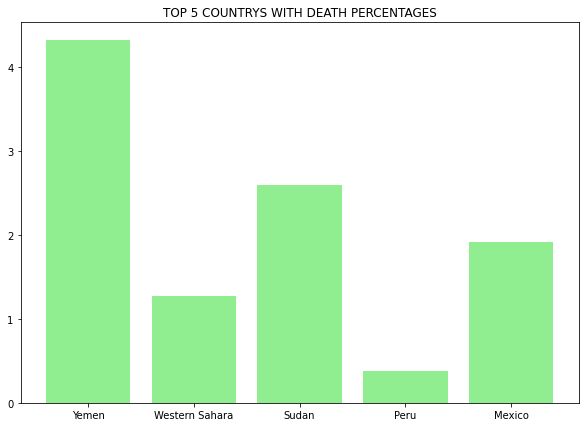

In [24]:
fig=plt.figure(figsize=(10,7))
plt.bar(name,D_percentage,color='lightgreen')
plt.title('TOP 5 COUNTRYS WITH DEATH PERCENTAGES')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Legend does not support 4.313743132 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Legend does not support 1.275057509 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Legend does not support 2.587215976 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Legend does not support 0.382270638 instances.
A proxy artist ma

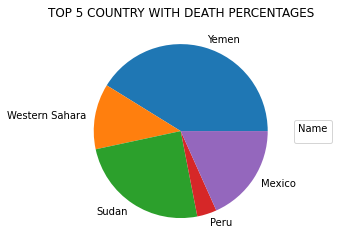

In [25]:
plt.title('TOP 5 COUNTRY WITH DEATH PERCENTAGES')
plt.pie(D_percentage,labels=name)
plt.legend(D_percentage,name,
          title ="Name",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

In [26]:
data

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
193,Sudan,Sudan,SDN,45640385,Africa,61955,4907,1357,108,7.920265
158,Peru,Peru,PER,33775745,Latin America and the Caribbean,3548559,212328,105062,6286,5.983499
130,Mexico,Mexico,MEX,131303955,Latin America and the Caribbean,5665376,323212,43147,2462,5.705041
...,...,...,...,...,...,...,...,...,...,...
118,Macao,"China, Macao Special Administrative Region",MAC,664828,Asia,82,0,123,0,0.000000
125,Marshall Islands,Marshall Islands,MHL,59889,Oceania,7,0,117,0,0.000000
131,Micronesia,Micronesia (Federated States of),FSM,117134,Oceania,1,0,9,0,0.000000
46,Cook Islands,Cook Islands,COK,17592,Oceania,2118,0,120396,0,0.000000


In [27]:
data.head(5)

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
193,Sudan,Sudan,SDN,45640385,Africa,61955,4907,1357,108,7.920265
158,Peru,Peru,PER,33775745,Latin America and the Caribbean,3548559,212328,105062,6286,5.983499
130,Mexico,Mexico,MEX,131303955,Latin America and the Caribbean,5665376,323212,43147,2462,5.705041


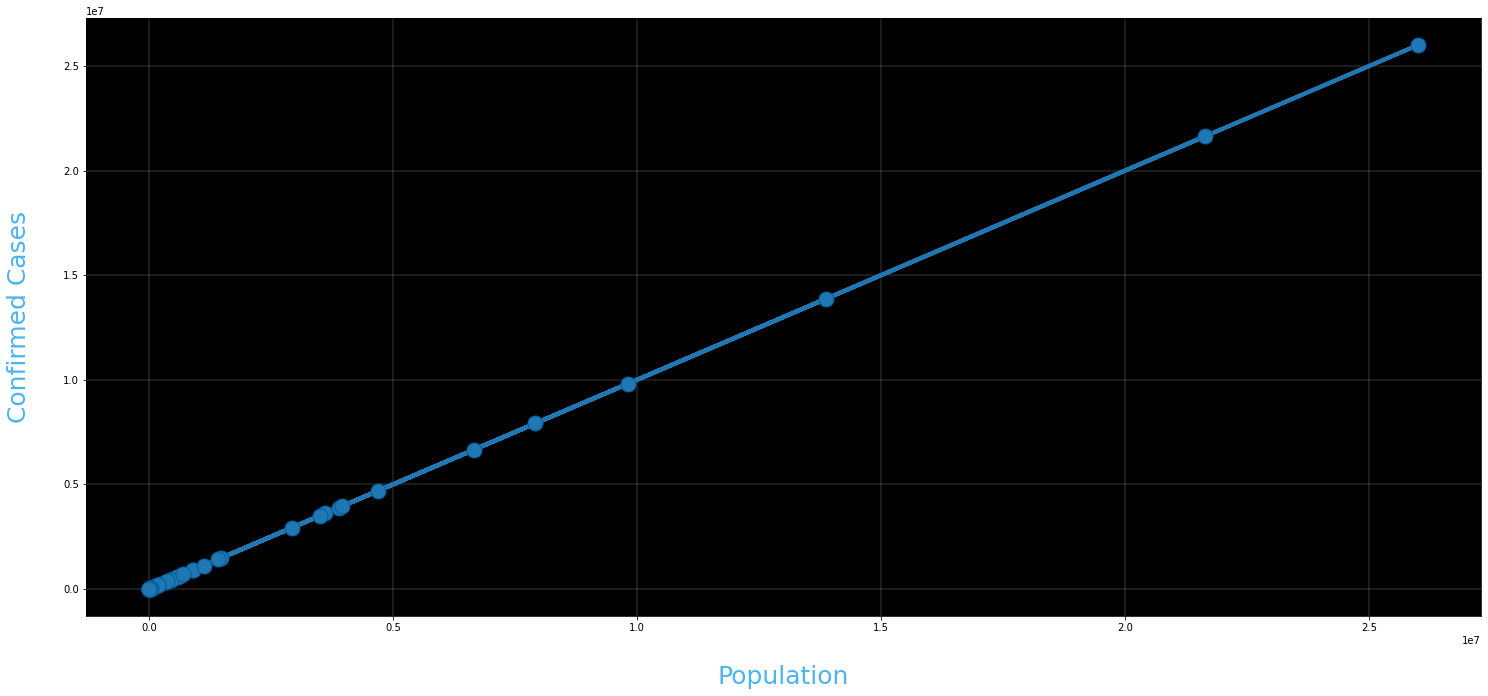

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Y=data.iloc[158:,5].values
R=data.iloc[158:,5].values
D=data.iloc[158:,5].values
X=data.iloc[158:,5]
plt.figure(figsize=(25,11))

ax = plt.axes()
ax.grid(linewidth=0.4, color='#8f8f8f')
 
ax.set_facecolor("black")
ax.set_xlabel('\nPopulation',size=25,color='#4bb4f2')
ax.set_ylabel('Confirmed Cases\n',
              size=25,color='#4bb4f2')
 
ax.plot(X,Y,
        color='#1F77B4',
        marker='o',
        linewidth=4,
        markersize=15,
        markeredgecolor='#035E9B')

In [61]:
data.head(5)

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
193,Sudan,Sudan,SDN,45640385,Africa,61955,4907,1357,108,7.920265
158,Peru,Peru,PER,33775745,Latin America and the Caribbean,3548559,212328,105062,6286,5.983499
130,Mexico,Mexico,MEX,131303955,Latin America and the Caribbean,5665376,323212,43147,2462,5.705041


In [66]:
data1=data.head(5)

In [67]:
data1

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
193,Sudan,Sudan,SDN,45640385,Africa,61955,4907,1357,108,7.920265
158,Peru,Peru,PER,33775745,Latin America and the Caribbean,3548559,212328,105062,6286,5.983499
130,Mexico,Mexico,MEX,131303955,Latin America and the Caribbean,5665376,323212,43147,2462,5.705041


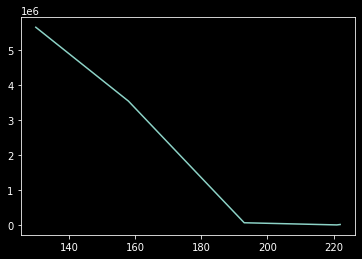

In [81]:
from matplotlib import style
data=data1['Total Cases']
plt.style.use('dark_background')
plt.plot(data)
plt.show()

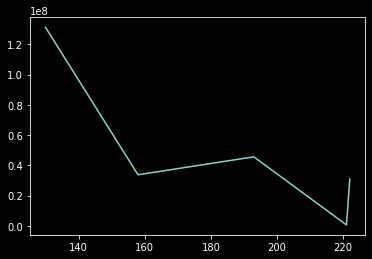

In [83]:
from matplotlib import style
data=data1['Population']
plt.style.use('dark_background')
plt.plot(data)
plt.show()

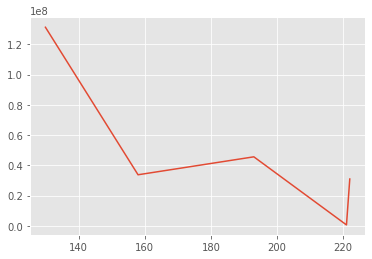

In [84]:
from matplotlib import style
data=data1['Population']
plt.style.use('ggplot')
plt.plot(data)
plt.show()